In [1]:
!pip install folium
!pip install geopy
import folium
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from geopy.geocoders import ArcGIS

In [2]:
mum_prop=pd.read_csv(r'C:\Users\smoks\house price\Mumbai_Property.csv')

In [3]:
mum_prop.head()

,Property_Name,Location,Region,Property_Age,Availability,Area_Tpye,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
0,Omkar Alta Monte,W E Highway Malad East Mumbai,Malad Mumbai,0 to 1 Year,Ready To Move,Super Built Up Area,2900.0,17241,14,3,4,500.0
1,T Bhimjyani Neelkanth Woods,Manpada Thane Mumbai,Manpada Thane,1 to 5 Year,Ready To Move,Super Built Up Area,1900.0,12631,8,3,3,240.0
2,Legend 1 Pramila Nagar,Dahisar West Mumbai,Dahisar Mumbai,10+ Year,Ready To Move,Super Built Up Area,595.0,15966,3,1,2,95.0
3,Unnamed Property,Vidyavihar West Vidyavihar West Central Mumbai...,Central Mumbai,5 to 10 Year,Ready To Move,Built Up Area,1450.0,25862,1,3,3,375.0
4,Unnamed Property,176 Cst Road Kalina Mumbai 400098 Santacruz Ea...,Santacruz Mumbai,5 to 10 Year,Ready To Move,Carpet Area,876.0,39954,5,2,2,350.0


In [4]:
mum_prop.shape

(2580, 12)

In [5]:
mum_prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Property_Name  2580 non-null   object 
 1   Location       2580 non-null   object 
 2   Region         2580 non-null   object 
 3   Property_Age   2580 non-null   object 
 4   Availability   2580 non-null   object 
 5   Area_Tpye      2580 non-null   object 
 6   Area_SqFt      2580 non-null   float64
 7   Rate_SqFt      2580 non-null   int64  
 8   Floor_No       2580 non-null   int64  
 9   Bedroom        2580 non-null   int64  
 10  Bathroom       2580 non-null   int64  
 11  Price_Lakh     2580 non-null   float64
dtypes: float64(2), int64(4), object(6)
memory usage: 242.0+ KB


In [6]:
mum_prop.Availability.value_counts()

Availability
Ready To Move         2565
Under Construction      15
Name: count, dtype: int64

In [7]:
mum_prop.Region.value_counts().head(20)

Region
Central Mumbai               225
Mira Road                    201
Kharghar Navi-Mumbai         196
Thane                        192
Ulwe Navi-Mumbai             174
Mumbai Harbour               104
South Mumbai                  98
Dombivli Thane                85
Hiranandani Thane             79
Ghansoli Navi-Mumbai          76
Kamothe Navi-Mumbai           64
Kandivali Mumbai              62
Panvel Navi-Mumbai            61
Malad Mumbai                  59
Kalyan Thane                  58
Andheri Mumbai                46
Taloja Navi-Mumbai            44
Manpada Thane                 42
Koparkhairane Navi-Mumbai     39
Borivali Mumbai               33
Name: count, dtype: int64

In [8]:
mum_prop.Region.nunique()

145

In [9]:
mum_prop.describe().round(2)

,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
count,2580.00,2580.00,2580.00,2580.00,2580.00,2580.00
mean,1026.11,19111.85,8.84,1.96,2.07,174.39
std,2287.13,40760.88,8.10,0.84,0.75,369.48
min,33.57,84.00,-1.00,1.00,1.00,13.00
25%,630.75,8791.75,3.00,1.00,2.00,67.00
50%,850.00,13785.00,6.00,2.00,2.00,111.50
75%,1156.00,22650.00,12.00,2.00,2.00,200.00
max,100000.00,1650000.00,59.00,6.00,7.00,16500.00


In [10]:
Q1=np.quantile(mum_prop.Area_SqFt,0.02)
Q3=np.quantile(mum_prop.Area_SqFt,0.98)
med=np.median(mum_prop.Area_SqFt)
IQR=Q3-Q1
upper_bound=Q3+(1.5*IQR)
lower_bound=Q1-(1.5*IQR)
outliers1=mum_prop.Area_SqFt[(mum_prop.Area_SqFt<=lower_bound) | (mum_prop.Area_SqFt >= upper_bound)]
mum_prop=mum_prop.drop(outliers1.index).reset_index(drop=True)

In [11]:
Q1=np.quantile(mum_prop.Rate_SqFt,0.02)
Q3=np.quantile(mum_prop.Rate_SqFt,0.80)
med=np.median(mum_prop.Rate_SqFt)
IQR=Q3-Q1
upper_bound=Q3+(1.5*IQR)
lower_bound=Q1-(1.5*IQR)
outliers1=mum_prop.Rate_SqFt[(mum_prop.Rate_SqFt<=lower_bound) | (mum_prop.Rate_SqFt >= upper_bound)]
mum_prop=mum_prop.drop(outliers1.index).reset_index(drop=True)

In [12]:
mum_prop.describe().round(2)

,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
count,2538.00,2538.00,2538.00,2538.00,2538.00,2538.00
mean,948.95,16546.14,8.79,1.95,2.05,161.27
std,486.53,10192.02,7.98,0.83,0.73,162.12
min,185.00,1808.00,-1.00,1.00,1.00,13.00
25%,634.25,8762.25,3.00,1.00,2.00,66.25
50%,850.00,13629.50,6.00,2.00,2.00,110.00
75%,1150.00,22278.75,12.00,2.00,2.00,196.75
max,5000.00,55611.00,55.00,6.00,7.00,1900.00


In [13]:
mum_prop.duplicated().sum()

7

In [14]:
mum_prop=mum_prop.drop_duplicates(ignore_index=True)

In [15]:
mum_prop.isna().sum()

Property_Name    0
Location         0
Region           0
Property_Age     0
Availability     0
Area_Tpye        0
Area_SqFt        0
Rate_SqFt        0
Floor_No         0
Bedroom          0
Bathroom         0
Price_Lakh       0
dtype: int64

In [16]:
mum_prop.shape

(2531, 12)

In [17]:
mum_prop.to_csv(r'C:\Users\smoks\Downloads\Datasets\Final_Project.csv',index_label=False)
mum_prop=pd.read_csv(r'C:\Users\smoks\Downloads\Datasets\Final_Project.csv')

In [18]:
rcParams={'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

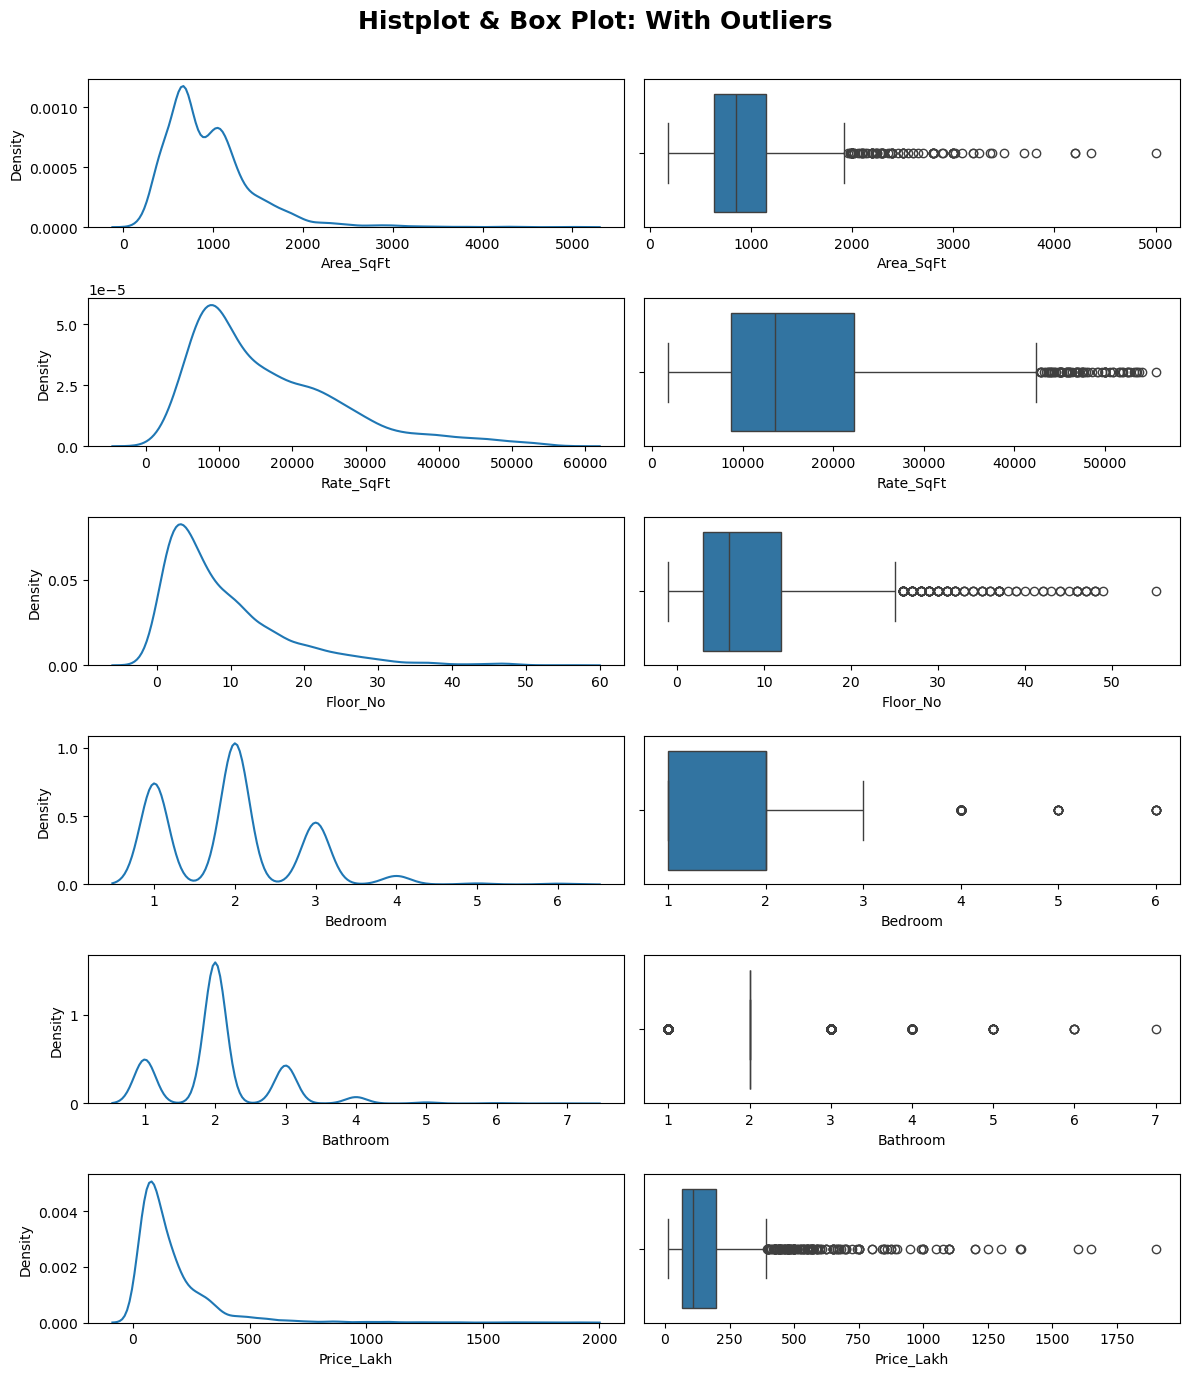

In [19]:
fig, ax = plt.subplots(6,2,figsize=(12,14))
fig.suptitle('Histplot & Box Plot: With Outliers', size=18,fontweight="bold")
sns.kdeplot(ax=ax[0,0],data = mum_prop, x = 'Area_SqFt')
sns.boxplot(ax=ax[0,1],data = mum_prop, x = 'Area_SqFt')
sns.kdeplot(ax=ax[1,0],data = mum_prop, x = 'Rate_SqFt')
sns.boxplot(ax=ax[1,1],data = mum_prop, x = 'Rate_SqFt')
sns.kdeplot(ax=ax[2,0],data = mum_prop, x = 'Floor_No')
sns.boxplot(ax=ax[2,1],data = mum_prop, x = 'Floor_No')
sns.kdeplot(ax=ax[3,0],data = mum_prop, x = 'Bedroom')
sns.boxplot(ax=ax[3,1],data = mum_prop, x = 'Bedroom')
sns.kdeplot(ax=ax[4,0],data = mum_prop, x = 'Bathroom')
sns.boxplot(ax=ax[4,1],data = mum_prop, x = 'Bathroom')
sns.kdeplot(ax=ax[5,0],data = mum_prop, x = 'Price_Lakh')
sns.boxplot(ax=ax[5,1],data = mum_prop, x = 'Price_Lakh')

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

In [20]:
num_columns=mum_prop.describe().columns
categorical_cols=mum_prop.describe(include='object').columns

In [21]:
mum_prop.nunique()

Property_Name     894
Location         1294
Region            145
Property_Age        5
Availability        2
Area_Tpye           4
Area_SqFt         696
Rate_SqFt        1990
Floor_No           52
Bedroom             6
Bathroom            7
Price_Lakh        467
dtype: int64

In [22]:
binary_variables=[i for i in mum_prop.columns if (len(mum_prop[i].unique())==2)]

In [23]:
binary_variables

['Availability']

In [24]:
ordinal_variables=[i for i in mum_prop.columns if ((len(mum_prop[i].unique())>2) and (len(mum_prop[i].unique())<=53))]

In [25]:
ordinal_variables

['Property_Age', 'Area_Tpye', 'Floor_No', 'Bedroom', 'Bathroom']

In [26]:
continuous_variable=[i for i in mum_prop.columns if((len(mum_prop[i].unique())>53))]
continuous_variable=continuous_variable[3:-1]

In [27]:
continuous_variable

['Area_SqFt', 'Rate_SqFt']

In [28]:
target_variable='Price_Lakh'

In [29]:
target_variable

'Price_Lakh'

In [30]:
ordinal_variable='Bedroom'

In [31]:
print(ordinal_variable)
print('Element in binary category:',len(ordinal_variable))

Bedroom
Element in binary category: 7


In [32]:
mum_prop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2531 entries, 0 to 2530
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Property_Name  2531 non-null   object 
 1   Location       2531 non-null   object 
 2   Region         2531 non-null   object 
 3   Property_Age   2531 non-null   object 
 4   Availability   2531 non-null   object 
 5   Area_Tpye      2531 non-null   object 
 6   Area_SqFt      2531 non-null   float64
 7   Rate_SqFt      2531 non-null   int64  
 8   Floor_No       2531 non-null   int64  
 9   Bedroom        2531 non-null   int64  
 10  Bathroom       2531 non-null   int64  
 11  Price_Lakh     2531 non-null   float64
dtypes: float64(2), int64(4), object(6)
memory usage: 257.1+ KB


In [33]:
mum_prop.columns

Index(['Property_Name', 'Location', 'Region', 'Property_Age', 'Availability',
       'Area_Tpye', 'Area_SqFt', 'Rate_SqFt', 'Floor_No', 'Bedroom',
       'Bathroom', 'Price_Lakh'],
      dtype='object')

In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
mum_prop['Property_Name']=le.fit_transform(mum_prop['Property_Name'])
mum_prop['Property_Name'].unique()

array([481, 791, 355, 831, 847, 781, 216,  76, 237, 380, 377, 191, 546,
       846,  91, 276, 666, 507, 349, 754, 725,  92, 174, 366, 609, 470,
       506, 376, 681, 472, 723,  44, 768, 304,  60, 875, 370, 843,  45,
       114, 167, 603, 374, 165, 356, 338, 848,  15, 793, 557, 210, 682,
       598, 359, 841, 189, 601, 394, 670,  80, 882, 820, 653, 112, 418,
       411, 421, 379, 371, 197, 332, 395, 489,  62,  24, 240, 221, 308,
       283, 272, 830, 350, 869, 635,   1, 873, 373, 636, 877, 708, 738,
       667, 294, 214, 127, 205, 490, 755, 645, 144, 849, 881, 859, 217,
       590, 510, 893, 318,  40, 883, 499, 292, 334, 494,  85, 727, 134,
        77, 568, 256, 807,  14, 157, 608, 383, 108, 384, 267, 331, 429,
       705,  33, 757, 280,   0, 100, 252, 813, 405, 351,  47, 721, 785,
       135, 777, 151, 303, 404, 885, 511, 736, 564, 750, 732, 773, 479,
       647, 153, 874, 417, 729, 689, 141, 344, 786, 643, 690, 713, 695,
        59, 132, 712, 450, 817,  79, 249, 763, 884,  41, 525, 53

In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
mum_prop['Location']=le.fit_transform(mum_prop['Location'])
mum_prop['Location'].unique()

array([1264,  877,  675, ...,  434,  226, 1127])

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
mum_prop['Region']=le.fit_transform(mum_prop['Region'])
mum_prop['Region'].unique() 

array([ 69,  73,  24,  18, 107, 139,  41,  78,   6,  39,  33, 125, 130,
        92,  60,  27, 133, 118,  20,  48,  19, 110,  93,  58,  80,  44,
        37,  34,  16,  68,  23,  10, 136,  89,   2,  32,  31,  74, 134,
       121,  59,  76,  11,  79,  81,  40,  53, 131,  22,  85, 141,  35,
       104,   3,  65, 114,  87,  13,  75, 115, 127, 137,  86, 124,  57,
         7,  67, 109,  25,  42, 142,  55, 129,   0,   9,  90, 116,  14,
         4, 113, 123, 112, 138,  56, 102,  49,  98, 111, 103, 117, 122,
       106, 140,  43,  38,  51,  12,   1, 119,  26,  15,  29, 100,  54,
       105,  97,  82,  52,  47,  46,  96, 132,  64,  63,  84,  62, 120,
       144,  91,  72, 135,  30,  50,  61, 126,  21, 143,  77,  70,  28,
         8,  17,  94, 101,  66,  95,   5,  83,  99,  45, 128,  88, 108,
        71,  36])

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
mum_prop['Property_Age']=le.fit_transform(mum_prop['Property_Age'])
mum_prop['Property_Age'].unique()  

array([0, 1, 2, 3, 4])

In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
mum_prop['Availability']=le.fit_transform(mum_prop['Availability'])
mum_prop['Availability'].unique()

array([0, 1])

In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
mum_prop['Area_Tpye']=le.fit_transform(mum_prop['Area_Tpye'])
mum_prop['Area_Tpye'].unique()

array([3, 0, 1, 2])

In [40]:
x=mum_prop[['Property_Name', 'Location', 'Region', 'Property_Age', 'Availability',
       'Area_Tpye', 'Area_SqFt', 'Rate_SqFt', 'Floor_No', 'Bedroom',
       'Bathroom']]

In [41]:
x

,Property_Name,Location,Region,Property_Age,Availability,Area_Tpye,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom
0,481,1264,69,0,0,3,2900.0,17241,14,3,4
1,791,877,73,1,0,3,1900.0,12631,8,3,3
2,355,675,24,2,0,3,595.0,15966,3,1,2
3,831,1251,18,3,0,0,1450.0,25862,1,3,3
4,831,242,107,3,0,1,876.0,39954,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...
2526,684,1132,130,1,0,0,1180.0,10338,2,2,2
2527,225,1109,130,0,0,0,1090.0,8073,11,2,2
2528,79,1227,130,1,0,0,1295.0,10579,6,2,2
2529,79,1227,130,1,0,0,1850.0,9243,6,3,3


In [42]:
y=mum_prop['Price_Lakh']

In [43]:
y

0       500.0
1       240.0
2        95.0
3       375.0
4       350.0
        ...  
2526    122.0
2527     88.0
2528    137.0
2529    171.0
2530     95.0
Name: Price_Lakh, Length: 2531, dtype: float64

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [45]:
x_train.shape

(2277, 11)

In [46]:
x_test.shape

(254, 11)

In [47]:
y_train.shape

(2277,)

In [48]:
y_test.shape

(254,)

In [49]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred=reg.predict(x_test)
score=r2_score(y_pred,y_test)
print(score)

0.7226732745979618


In [50]:
from sklearn.metrics import r2_score
from sklearn import tree
reg1= tree.DecisionTreeRegressor()
reg1.fit(x_train, y_train)
y_pred=reg1.predict(x_test)
score=r2_score(y_pred,y_test)
print(score)

0.9281535690518139


In [51]:
prediction=reg1.predict([[355,675,24,2,0,3,595.0,15966,3,1,2]])

C:\Users\smoks\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [52]:
print(prediction)

[95.]


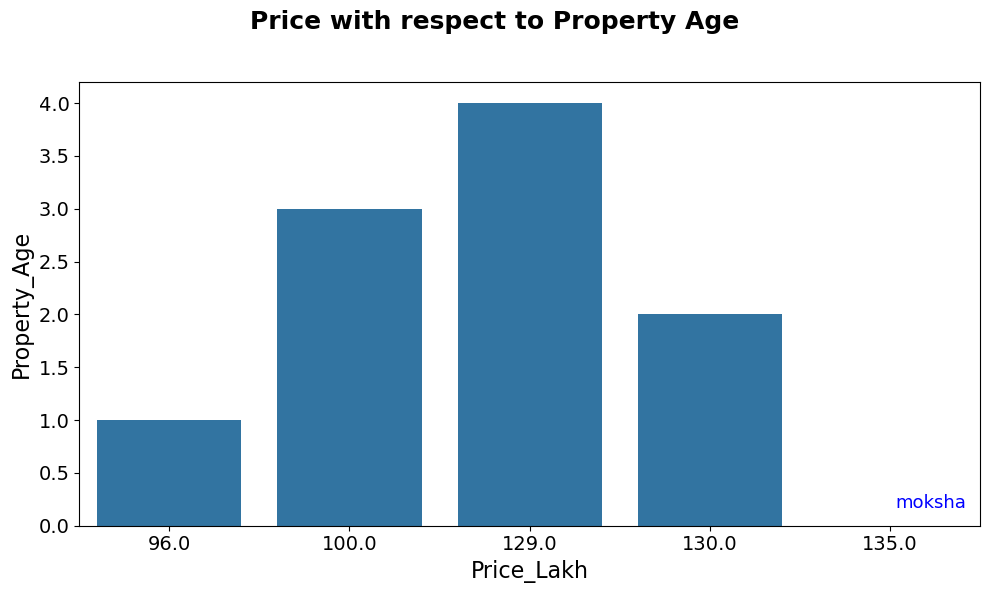

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
fig = plt.figure(figsize=(10, 6))
grouped = mum_prop.groupby('Property_Age').median(numeric_only=True)
sns.barplot(x=grouped['Price_Lakh'], y=grouped.index)
fig.suptitle('Price with respect to Property Age', fontsize=18, fontweight="bold")
fig.text(0.9, 0.15, 'moksha', fontsize=13, color='blue')
pylab.rcParams.update(rcParams)
fig.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

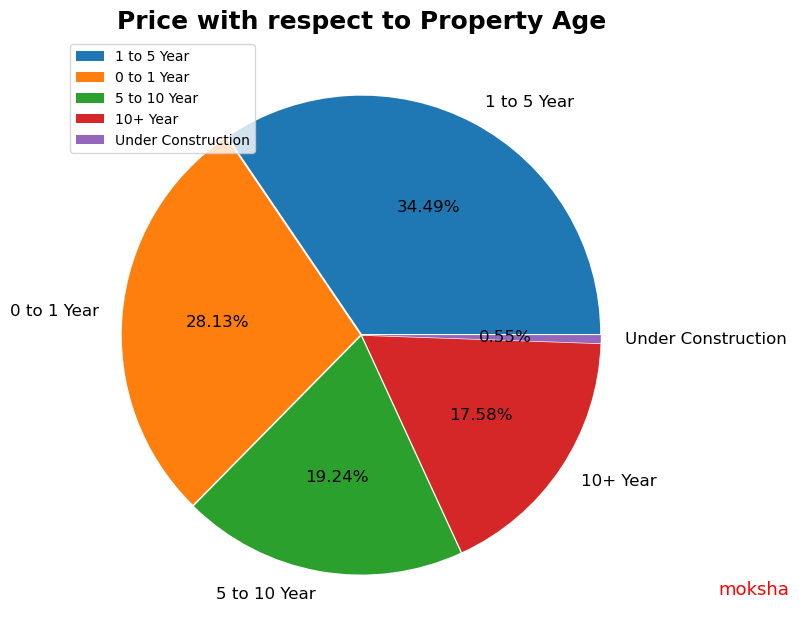

In [54]:
fig=plt.figure(figsize=(8,8))
plt.pie(mum_prop['Property_Age'].value_counts(),
        labels=['1 to 5 Year','0 to 1 Year','5 to 10 Year','10+ Year','Under Construction'],
        autopct='%.2f%%',textprops={'size':'large'},explode=[0.005,0.005,0.005,0.005,0.005])
plt.legend(loc='upper left')
plt.title("Price with respect to Property Age",fontsize=18,fontweight='bold')
fig.text(0.9,0.15,'moksha',fontsize=13,color='red')

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

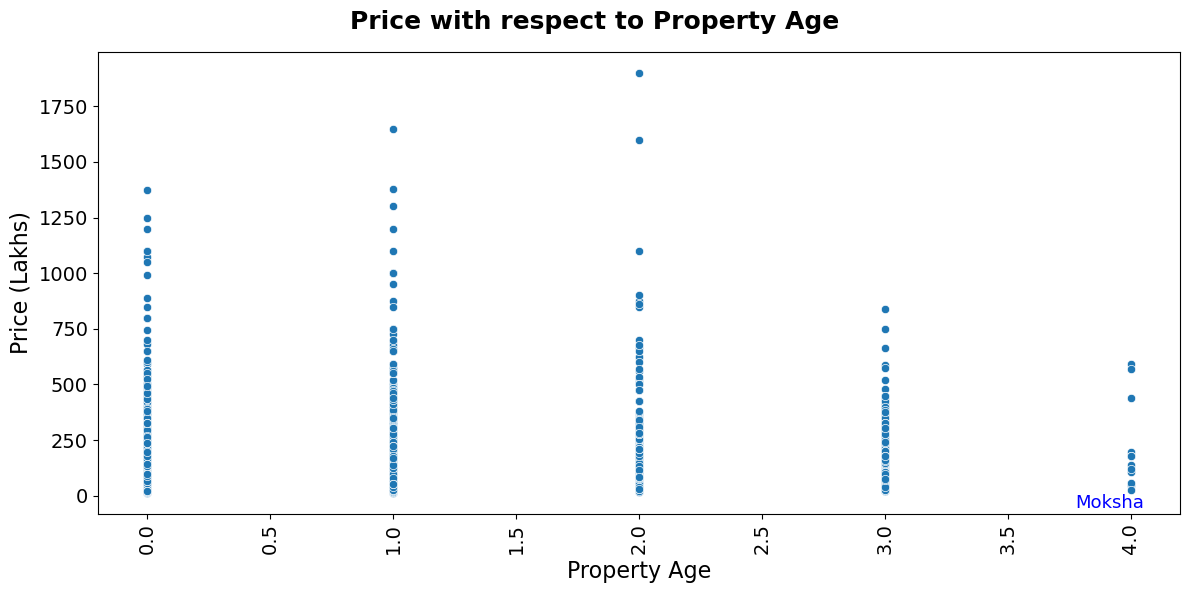

In [55]:
fig=plt.figure(figsize=(12,6))
fig.suptitle('Price with respect to Property Age',size=18,fontweight='bold')
fig.text(0.9,0.15,'Moksha',fontsize=13,color='blue')

sns.scatterplot(data=mum_prop,x=mum_prop['Property_Age'],y=mum_prop['Price_Lakh'])
plt.xlabel("Property Age",size=16)
plt.ylabel("Price (Lakhs)",size=16)
plt.xticks(rotation=90)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

In [56]:
import pickle

In [57]:
filename = 'housepriceprediction.pkl'
pickle.dump(reg,open(filename,'wb'))